In [3]:
#Pregunta 1
with open('lorem.dat', 'r', encoding='utf-8') as archivo:
    texto = archivo.read()
texto = texto.lower()

a = 0
e = 0
i = 0
o = 0
u = 0

for caracter in texto:
    if caracter == 'a':
        a += 1
    elif caracter == 'e':
        e += 1
    elif caracter == 'i':
        i += 1
    elif caracter == 'o':
        o += 1
    elif caracter == 'u':
        u += 1

print("Cantidad de veces que aparece cada vocal:")
print(f"Numero de letras A: {a}")
print(f"Numero de letras E: {e}")
print(f"Numero de letras i: {i}")
print(f"Numero de letras O: {o}")
print(f"Numero de letras U: {u}")

Cantidad de veces que aparece cada vocal:
Numero de letras A: 55
Numero de letras E: 101
Numero de letras i: 90
Numero de letras O: 27
Numero de letras U: 72


In [4]:
#Pregunta 2
import numpy as np

lista = list(range(1, 16))
print("Lista original:", lista)
print("Longitud lista:", len(lista))

lista.insert(6, "numeros")
print("Entre 6 y 7 la palabra numeros", lista)

lista.append(16)
print("Luego de agregar el 16 al final", lista)

segunda_lista = ["perro", 65.3, True, 4]

lista.extend(segunda_lista)
print("Dos listas juntas:", lista)
tercera_lista = lista * 2
print("Tercera lista (duplicada):", tercera_lista)


Lista original: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
Longitud lista: 15
Entre 6 y 7 la palabra numeros [1, 2, 3, 4, 5, 6, 'numeros', 7, 8, 9, 10, 11, 12, 13, 14, 15]
Luego de agregar el 16 al final [1, 2, 3, 4, 5, 6, 'numeros', 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]
Dos listas juntas: [1, 2, 3, 4, 5, 6, 'numeros', 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 'perro', 65.3, True, 4]
Tercera lista (duplicada): [1, 2, 3, 4, 5, 6, 'numeros', 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 'perro', 65.3, True, 4, 1, 2, 3, 4, 5, 6, 'numeros', 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 'perro', 65.3, True, 4]


In [7]:
#Pregunta 3
def validador_rut(rut):
    """
    Funcion validadora de RUT.
    -----------------------------------
    Verifica:
    - Que el RUT ingresado tenga el formato correcto:
        x.xxx.xxx-x  o  xx.xxx.xxx-x
    - Que los caracteres sean validos (solo digitos y DV numérico o 'K'/'k')
    - Que el dígito verificador calculado coincida con el ingresado.

    Retorna:
    - True  : si el RUT es válido
    - False : si el RUT es inválido
    - None  : si el formato es incorrecto
    """

    if not isinstance(rut, str):
        print("El RUT debe ser una cadena de caracteres.")
        return None

    if " " in rut:
        print("El RUT no debe contener espacios.")
        return None

    if len(rut) not in [11, 12]:
        print("Largo incorrecto. Debe ser del tipo x.xxx.xxx-x o xx.xxx.xxx-x.")
        return None

    if len(rut) == 11:
        if not (rut[1] == '.' and rut[5] == '.' and rut[9] == '-'):
            print("Formato incorrecto. Use x.xxx.xxx-x.")
            return None
    else:
        if not (rut[2] == '.' and rut[6] == '.' and rut[10] == '-'):
            print("Formato incorrecto. Use xx.xxx.xxx-x.")
            return None

    cuerpo, dv_input = rut.split('-')
    cuerpo_sin_puntos = cuerpo.replace('.', '')

    if not cuerpo_sin_puntos.isdigit():
        print("El cuerpo del RUT (RUT sin DV) debe contener solo numeros.")
        return None

    if not (dv_input.isdigit() or dv_input.upper() == 'K'):
        print("Digito verificador invalido. Debe ser un numero o 'K'.")
        return None

    reversed_digits = list(map(int, reversed(cuerpo_sin_puntos)))
    factores = [2, 3, 4, 5, 6, 7]
    suma = sum(d * factores[i % len(factores)] for i, d in enumerate(reversed_digits))
    resto = suma % 11
    dv_calculado = 11 - resto

    if dv_calculado == 11:
        dv_real = '0'
    elif dv_calculado == 10:
        dv_real = 'K'
    else:
        dv_real = str(dv_calculado)

    if dv_input.upper() == dv_real:
        print(f"RUT valido. Digito verificador correcto ({dv_real}).")
        return True
    else:
        print(f"RUT inválido. Digito verificador debiese ser {dv_real}.")
        return False

validador_rut("22.135.895-3")


RUT valido. Digito verificador correcto (3).


True

In [8]:
#Pregunta 4
def cifrado_cesar():
    """
    Implementa el cifrado César para el alfabeto español.
    Lee el texto desde 'texto.dat' y escribe el resultado cifrado en 'texto_cifrado.dat'.
    """

    n_cifr = 3

    alfabeto = "abcdefghijklmnñopqrstuvwxyz"
    letras_tildadas = {
        "á": "a", "é": "e", "í": "i", "ó": "o", "ú": "u",
        "Á": "A", "É": "E", "Í": "I", "Ó": "O", "Ú": "U"
    }
    try:
        with open("texto.dat", "r", encoding="utf-8") as f:
            texto = f.read()
    except FileNotFoundError:
        print("No se encontró el archivo 'texto.dat'.")
        return

    texto_cifrado = ""

    for char in texto:
        if char in letras_tildadas:
            char_procesado = letras_tildadas[char]
        else:
            char_procesado = char

        char_lower = char_procesado.lower()

        if char_lower in alfabeto:
            es_mayuscula = char_procesado.isupper()

            i = alfabeto.index(char_lower)
            nueva_letra = alfabeto[(i + n_cifr) % len(alfabeto)]

            if es_mayuscula:
                texto_cifrado += nueva_letra.upper()
            else:
                texto_cifrado += nueva_letra
        else:
            texto_cifrado += char_procesado
    try:
        with open("texto_cifrado.dat", "w", encoding="utf-8") as f:
            f.write(texto_cifrado)
        print("El texto fue cifrado correctamente y guardado en 'texto_cifrado.dat'.")
    except Exception as e:
        print(f"Error al escribir en el archivo: {e}")

cifrado_cesar()

El texto fue cifrado correctamente y guardado en 'texto_cifrado.dat'.


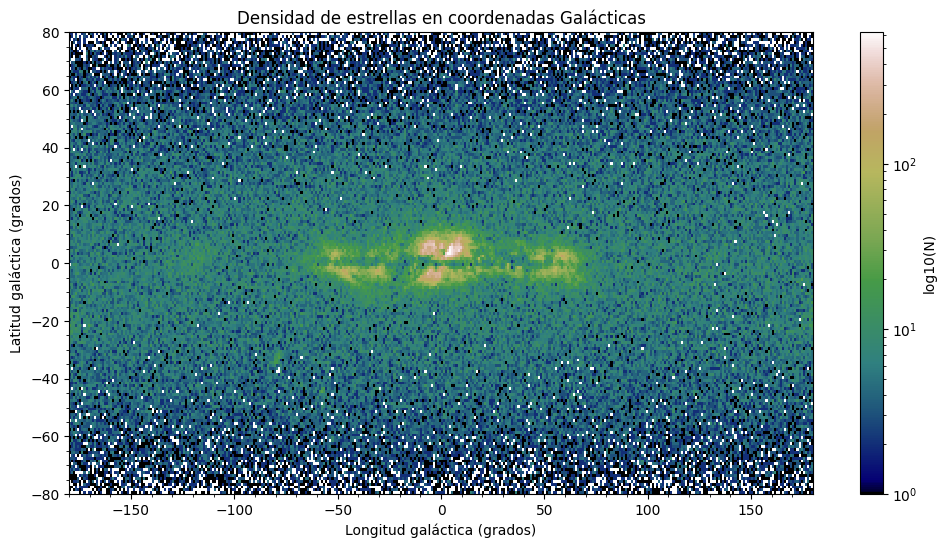

In [12]:
#Pregunta 5
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

Gaia = "Gaia_estrellas_100pc.dat"
columnas = np.genfromtxt(Gaia, names = True, dtype = None, encoding = "utf-8")

source_id = columnas["source_id"]
l = columnas["l"]
b = columnas["b"]
parallax = columnas["parallax"]
g_mean_mag = columnas["g_mean_mag"]
e_g_mean_mag = columnas["e_g_mean_mag"]
rp_mean_mag = columnas["rp_mean_mag"]
e_rp_mean_mag = columnas["e_rp_mean_mag"]
radial_velocity = columnas["radial_velocity"]
radial_velocity_error = columnas["radial_velocity_error"]

l_conv = ((l + 180) % 360) - 180
b_conv = ((b + 180) % 360) - 180

fig, ax = plt.subplots(figsize=(12, 6))
hist_densidad = plt.hist2d(l_conv, b_conv, bins=(360, 160), cmap="gist_earth", range=[[-180, 180], [-80, 80]], norm=LogNorm(vmin=1))
plt.colorbar(hist_densidad[3], label="log10(N)")
plt.xlim(-180, 180)
plt.ylim(-80, 80)
plt.xlabel('Longitud galáctica (grados)')
plt.ylabel('Latitud galáctica (grados)')
plt.title('Densidad de estrellas en coordenadas Galácticas')
ax.set_xticks(np.arange(-180, 180, 10), minor=True)
ax.set_yticks(np.arange(-80, 80, 5), minor=True)

plt.show()


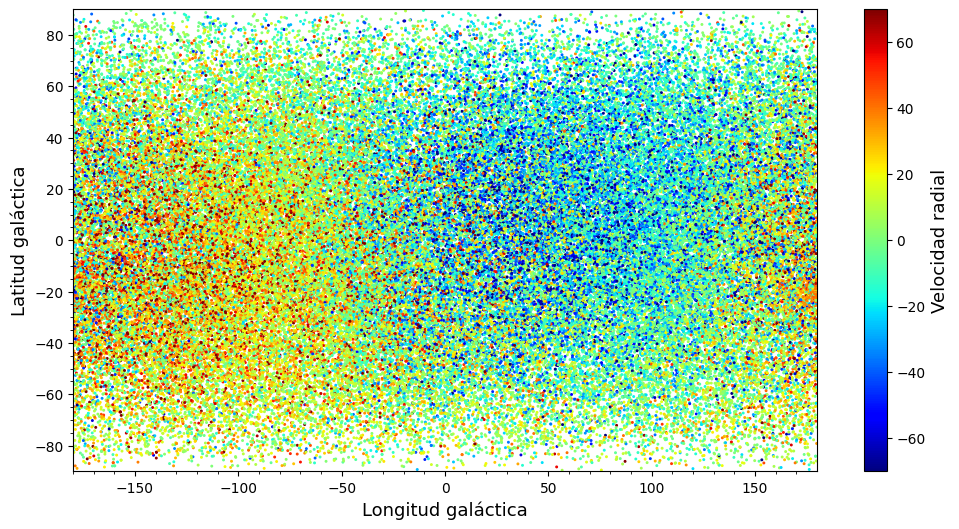

In [25]:
#Pregunta 6
filtro_nans = np.isfinite(l) & np.isfinite(b) & np.isfinite(radial_velocity) & np.isfinite(radial_velocity_error)
mask = filtro_nans & (radial_velocity_error < 3.0)

longitud = l[mask]
latitud = b[mask]
vel_radial = radial_velocity[mask]
longitud_conv = ((longitud + 180) % 360) - 180

fig, ax = plt.subplots(figsize=(12, 6))
grafico_disp = plt.scatter(longitud_conv, latitud, c=vel_radial, cmap="jet", vmin=-70, vmax=70, s=5, marker='.')
plt.xlabel("Longitud galáctica", fontsize=13)
plt.ylabel("Latitud galáctica",fontsize=13)
plt.xlim(-180, 180)
plt.ylim(-90, 90)
ax.set_xticks(np.arange(-180, 180, 10), minor=True)
ax.set_yticks(np.arange(-80, 80, 5), minor=True)
colorbar = plt.colorbar(grafico_disp)
colorbar.set_label("Velocidad radial",fontsize=13)

plt.show()

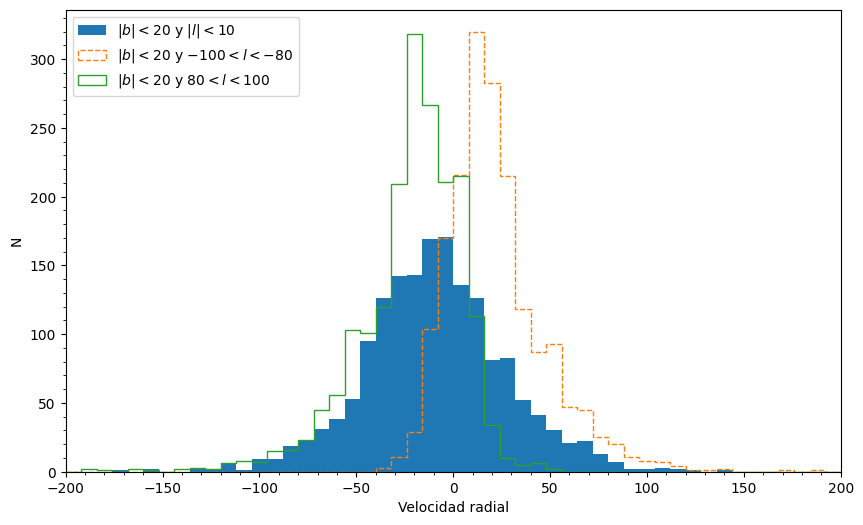

In [39]:
#Pregunta 7
catalogo = "Gaia_estrellas_100pc.dat"
data = np.genfromtxt(catalogo, names=True, dtype=None, encoding="utf-8")

l = data["l"]
b = data["b"]
vel_r = data["radial_velocity"]
vr_err = data["radial_velocity_error"]

l_conv = ((l + 180) % 360) - 180
calidad = (vr_err < 3.0)

mask1 = calidad & (np.abs(b) < 20) & (np.abs(l_conv) < 10)
mask2 = calidad & (np.abs(b) < 20) & (l_conv > -100) & (l_conv < -80)
mask3 = calidad & (np.abs(b) < 20) & (l_conv > 80) & (l_conv < 100)


fig, ax = plt.subplots(figsize=(10, 6))
bins_comunes = 50
rango_comun = (-200, 200)
plt.hist(vel_r[mask1], bins=bins_comunes, range=rango_comun,lw=2,
         label=r'$|b|<20$ y $|l|<10$')
plt.hist(vel_r[mask2], bins=bins_comunes, range=rango_comun, histtype='step', lw=2, linestyle='--',
         label=r'$|b|<20$ y $-100<l<-80$')
plt.hist(vel_r[mask3], bins=bins_comunes, range=rango_comun, histtype='step', lw=4,
         label=r'$|b|<20$ y $80<l<100$')
plt.xlabel('Velocidad radial')
plt.ylabel('N')
plt.xlim(-200, 200)
plt.legend(loc='upper left')
ax.minorticks_on()

plt.show()

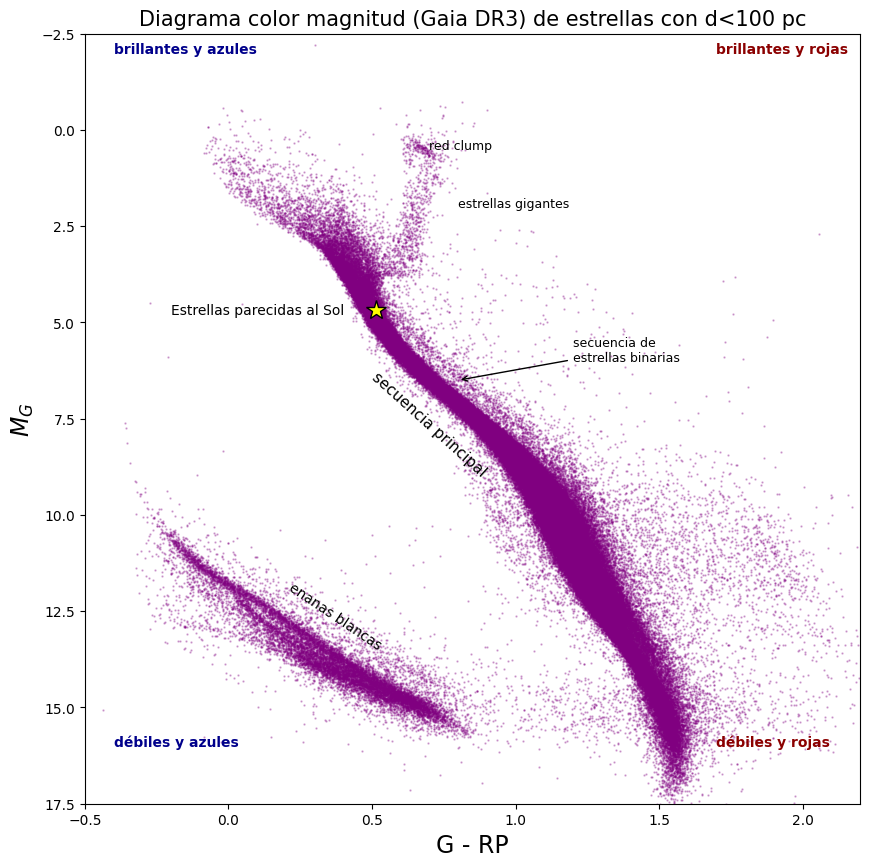

In [74]:
#Pregunta 8
catalogo = "Gaia_estrellas_100pc.dat"
data = np.genfromtxt(catalogo, names=True, dtype=None, encoding="utf-8")

parallax = data["parallax"]
g_mag = data["g_mean_mag"]
rp_mag = data["rp_mean_mag"]
e_g_mag = data["e_g_mean_mag"]
e_rp_mag = data["e_rp_mean_mag"]

distancia_pc = 1 / (parallax / 1000)
abs_mag_g = g_mag - 5 * np.log10(distancia_pc) + 5
color_index = g_mag - rp_mag

mask_calidad = (e_g_mag < 0.007) & (e_rp_mag < 0.04)
x_color = color_index[mask_calidad]
y_abs_mag = abs_mag_g[mask_calidad]

fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(x_color, y_abs_mag, s=0.5, c='purple', alpha=0.3)
ax.plot(0.513, 4.676, marker='*', color='yellow', markeredgecolor='black', markersize=15, label='Sol')
ax.text(-0.4, -2, 'brillantes y azules', color='darkblue', fontsize=10, fontweight='bold')
ax.text(1.7, -2, 'brillantes y rojas', color='darkred', fontsize=10, fontweight='bold')
ax.text(-0.4, 16, 'débiles y azules', color='darkblue', fontsize=10, fontweight='bold')
ax.text(1.7, 16, 'débiles y rojas', color='darkred', fontsize=10, fontweight='bold')
ax.text(0.7, 0.5, 'red clump', fontsize=9)
ax.text(0.8, 2.0, 'estrellas gigantes', fontsize=9)
ax.text(0.2, 13.5, 'enanas blancas', fontsize=10, rotation=-34)
ax.text(0.7, 9.0, 'secuencia principal',
        rotation=-42,
        fontsize=11,
        ha='center',
        color='black')
ax.annotate('secuencia de\nestrellas binarias', xy=(0.8, 6.5), xytext=(1.2, 6),
            arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize=9)
ax.text(-0.2, 4.676, 'Estrellas parecidas al Sol', fontsize=10, va='center')

ax.set_xlim(-0.5, 2.2)
ax.set_ylim(17.5, -2.5)
ax.set_xlabel('G - RP', fontsize=17)
ax.set_ylabel(r'$M_G$', fontsize=17)
ax.set_title('Diagrama color magnitud (Gaia DR3) de estrellas con d<100 pc', fontsize=15)

plt.savefig("Gaia_100pc.jpg", dpi=150)

plt.show()